In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('CarRentalDataV1.csv')

In [3]:
df

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
0,ELECTRIC,5.00,13.0,12.0,Seattle,US,47.449107,-122.308841,WA,12847615.0,135.0,Tesla,Model X,suv,2019.0,Albuquerque
1,ELECTRIC,5.00,2.0,1.0,Tijeras,US,35.111060,-106.276551,NM,15621242.0,190.0,Tesla,Model X,suv,2018.0,Albuquerque
2,HYBRID,4.92,28.0,24.0,Albuquerque,US,35.127163,-106.566681,NM,10199256.0,35.0,Toyota,Prius,car,2012.0,Albuquerque
3,GASOLINE,5.00,21.0,20.0,Albuquerque,US,35.149726,-106.711425,NM,9365496.0,75.0,Ford,Mustang,car,2018.0,Albuquerque
4,GASOLINE,5.00,3.0,1.0,Albuquerque,US,35.208659,-106.601008,NM,3553565.0,47.0,Chrysler,Sebring,car,2010.0,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,GASOLINE,5.00,32.0,27.0,Honolulu,US,21.292950,-157.836856,HI,9794111.0,33.0,Chevrolet,Cruze,car,2017.0,Honolulu
5847,HYBRID,5.00,17.0,16.0,Aiea,US,21.375507,-157.914919,HI,2754690.0,49.0,Lexus,HS 250h,car,2010.0,Honolulu
5848,GASOLINE,4.94,18.0,17.0,Kailua,US,21.378719,-157.727816,HI,11313508.0,35.0,smart,fortwo,car,2013.0,Honolulu
5849,GASOLINE,NaN,1.0,0.0,Waipahu,US,21.376105,-158.020237,HI,4209883.0,77.0,GMC,Savana,van,2015.0,Honolulu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   float64
 3   reviewCount         5851 non-null   float64
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   float64
 10  rate.daily          5851 non-null   float64
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   float64
 15  airportcity         5851 non-null   object 
dtypes: flo

In [5]:
df['rating'].describe()

count    5350.000000
mean        4.920325
std         0.182425
min         1.000000
25%         4.900000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [6]:
df.isna().sum()

fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
airportcity             0
dtype: int64

In [7]:
nan_rows = df[df['fuelType'].isna()][['fuelType','vehicle.make', 'vehicle.model']]

nan_rows.tail(20)

,fuelType,vehicle.make,vehicle.model
4192,NaN,Maserati,Ghibli
4220,NaN,Hyundai,Elantra
4224,NaN,Hyundai,Elantra
4225,NaN,Toyota,C-HR
4232,NaN,Chevrolet,Camaro
4241,NaN,Toyota,Highlander
4531,NaN,Ford,Transit-350 Wagon
4540,NaN,Mazda,MAZDA2
4615,NaN,Chevrolet,Sonic
4862,NaN,Tesla,Model 3


In [8]:
df.loc[(df['vehicle.make'] == 'Tesla') & (df['fuelType'].isna()), 'fuelType'] = 'ELECTRIC'

In [9]:
nan_rows = df[df['fuelType'].isna()][['fuelType','vehicle.make', 'vehicle.model']]

nan_rows.head(20)

,fuelType,vehicle.make,vehicle.model
32,NaN,Ford,Fiesta
151,NaN,Kia,Rio
213,NaN,Toyota,Camry
223,NaN,Land Rover,Range Rover
224,NaN,Audi,A8
328,NaN,Jeep,Wrangler Unlimited
421,NaN,Rolls Royce,Silver Shadow
607,NaN,Land Rover,Range Rover Velar
692,NaN,Polaris,Slingshot
777,NaN,Lexus,ES 300h


In [10]:
df['fuelType'] = df['fuelType'].fillna('GASOLINE')

In [11]:
df.isna().sum()

fuelType                0
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
airportcity             0
dtype: int64

In [12]:
#df['rating'].mean()
#df['rating'].describe()

In [13]:
df = df.drop('rating', axis=1)

In [14]:
df['location.country'].value_counts()

location.country
US    5851
Name: count, dtype: int64

In [15]:
df = df.drop('location.country', axis=1)

*Até aqui fiz a limpeza dos dados NaN. para 'fuelType' como eram poucos casos foi fácil avaliar a melhor abordagem.
*Para a coluna 'rating' eu optei pela exclusão completa, uma coluna que tem 3/4 dos dados e uma média < 4,9 não teria utilidade estatistica. Assim como 'locarion.coutry'.


array([[<Axes: title={'center': 'renterTripsTaken'}>,
        <Axes: title={'center': 'reviewCount'}>,
        <Axes: title={'center': 'location.latitude'}>],
       [<Axes: title={'center': 'location.longitude'}>,
        <Axes: title={'center': 'owner.id'}>,
        <Axes: title={'center': 'rate.daily'}>],
       [<Axes: title={'center': 'vehicle.year'}>, <Axes: >, <Axes: >]],
      dtype=object)

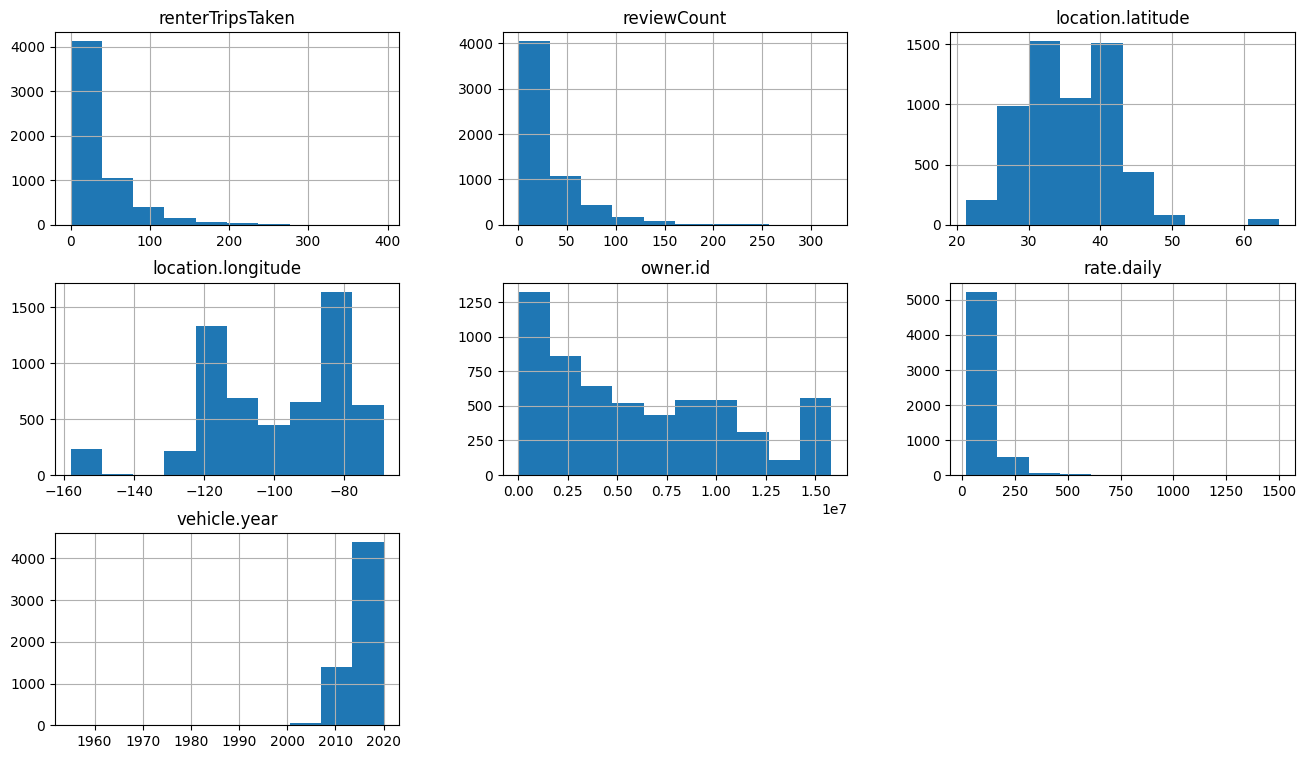

In [16]:
df.hist(figsize=(16,9))

In [17]:
df['rate.daily'].describe()

count    5851.000000
mean       93.691506
std        96.080920
min        20.000000
25%        45.000000
50%        69.000000
75%       110.000000
max      1500.000000
Name: rate.daily, dtype: float64

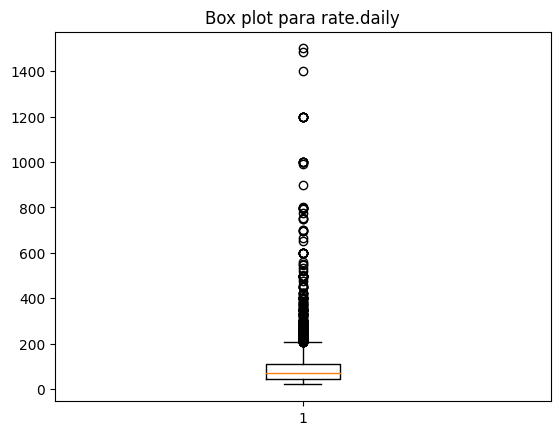

In [18]:
plt.boxplot(df['rate.daily'].dropna())
plt.title('Box plot para rate.daily')
plt.show()

In [19]:
df[df['rate.daily'] > 800]

,fuelType,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
431,GASOLINE,9.0,8.0,Cromwell,41.620066,-72.689211,CT,1581963.0,999.0,Lamborghini,Gallardo,car,2007.0,Hartford
877,GASOLINE,0.0,0.0,Monument,39.065143,-104.833966,CO,15248243.0,1485.0,Ford,Mustang,car,2020.0,Colorado Springs
1569,GASOLINE,21.0,15.0,Miami Beach,25.791807,-80.128564,FL,9541863.0,1199.0,Lamborghini,Huracan,car,2019.0,Fort Lauderdale
1572,GASOLINE,4.0,3.0,Miami Beach,25.792413,-80.128798,FL,9541863.0,1199.0,Lamborghini,Huracan,car,2019.0,Fort Lauderdale
1582,GASOLINE,13.0,11.0,Miami,25.833142,-80.330832,FL,10019710.0,1199.0,Lamborghini,Huracan,car,2019.0,Fort Lauderdale
1837,GASOLINE,2.0,1.0,Houston,29.821046,-95.483616,TX,15289116.0,990.0,Lamborghini,Gallardo,car,2010.0,Houston
2318,GASOLINE,47.0,45.0,Beverly Hills,34.070804,-118.400065,CA,1720300.0,999.0,Lamborghini,Huracan,car,2019.0,Los Angeles
3128,GASOLINE,19.0,12.0,Los Angeles,33.975733,-118.417978,CA,6166638.0,899.0,Ferrari,488 Spider,car,2019.0,Ontario
3150,GASOLINE,1.0,0.0,Los Angeles,34.106180,-118.332201,CA,2283050.0,999.0,Lamborghini,Huracan,car,2018.0,Ontario
3173,GASOLINE,38.0,26.0,Beverly Hills,34.067082,-118.402057,CA,2808193.0,999.0,Ferrari,488GTB,car,2019.0,Ontario


In [20]:
df[df['vehicle.year'] < 2000]

,fuelType,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
418,GASOLINE,2.0,2.0,Asheville,35.484145,-82.550781,NC,10681742.0,300.0,Ford,mustang,car,1968.0,Asheville
420,GASOLINE,1.0,1.0,Asheville,35.485123,-82.552384,NC,10681742.0,450.0,Ford,Shelby AC Cobra,car,1965.0,Asheville
421,GASOLINE,0.0,0.0,Asheville,35.614506,-82.648556,NC,3422524.0,700.0,Rolls Royce,Silver Shadow,car,1976.0,Asheville
888,GASOLINE,0.0,0.0,Corpus Christi,27.832321,-97.571911,TX,14690366.0,110.0,FIAT,124 Convertible 2000,car,1979.0,Corpus Christi
935,GASOLINE,4.0,3.0,Plano,33.080743,-96.739564,TX,2135384.0,79.0,Porsche,Boxster,car,1980.0,Dallas
1245,GASOLINE,54.0,51.0,Coppell,32.965781,-96.972723,TX,2682307.0,399.0,Chevrolet,Corvette,car,1961.0,Dallas-Fort Worth
1934,GASOLINE,0.0,0.0,Jacksonville,30.072527,-81.549892,FL,10041954.0,98.0,Mercedes-Benz,380sl,car,1983.0,Jacksonville
3163,GASOLINE,0.0,0.0,Los Angeles,34.045699,-118.232191,CA,6410040.0,535.0,Ferrari,348 Spider,car,1995.0,Ontario
3957,GASOLINE,11.0,8.0,North Kingstown,41.613909,-71.459708,RI,1508165.0,200.0,Ford,Mustang,car,1966.0,Providence
4083,GASOLINE,0.0,0.0,Cary,35.749907,-78.777680,NC,3632429.0,695.0,Porsche,356 Speedster,car,1957.0,Raleigh/Durham


Geralmente quando eu vejo o hist e box com essas distorções já penso que pode ser um outlier que precisa ser removido para normalizar os dados. mas nesse caso são dados legitimos. Então que começe a exploração.

<Axes: xlabel='location.latitude', ylabel='location.longitude'>

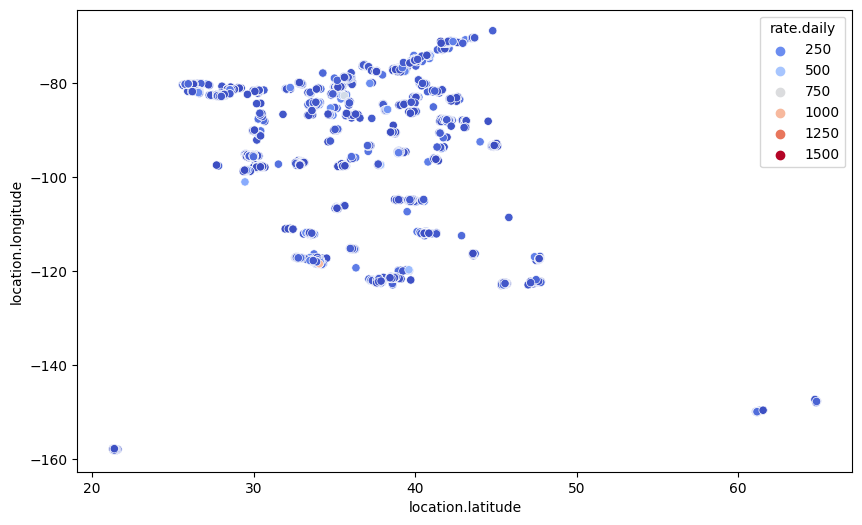

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='location.latitude', y='location.longitude', data = df, hue = 'rate.daily', palette='coolwarm')

In [22]:
best_clients = df['owner.id'].value_counts()
best_clients.head(15)


owner.id
1300675.0    49
4009047.0    47
64265.0      40
2459011.0    38
1300139.0    33
637495.0     29
1506983.0    28
950349.0     27
21255.0      26
8018380.0    26
742089.0     26
2263885.0    25
5887443.0    24
2245310.0    22
8808196.0    21
Name: count, dtype: int64

In [55]:
bff = best_clients.head(15)
best_clients.sum()
bff.sum()

461

In [24]:
most_frequent_rows = df[df['owner.id'] == best_clients.idxmax()]
selected_columns = most_frequent_rows[['owner.id','vehicle.make', 'vehicle.model', 'vehicle.type']]

selected_columns.head()


,owner.id,vehicle.make,vehicle.model,vehicle.type
2801,1300675.0,Toyota,Corolla,car
2802,1300675.0,Toyota,Corolla,car
2804,1300675.0,Toyota,Corolla,car
2805,1300675.0,Ford,Escape,suv
2806,1300675.0,Toyota,Corolla,car


tentei trabalhar alguma co-relação entre os melhores clientes que poderia ser revertido em algum lucro para empresa. Mas os Top 30 clientes da empresa correspondem à 10% das vendas, dá pra fazer alguma coisa para fidelizar, mas o grosso da renda vem de clientes esporádicos.

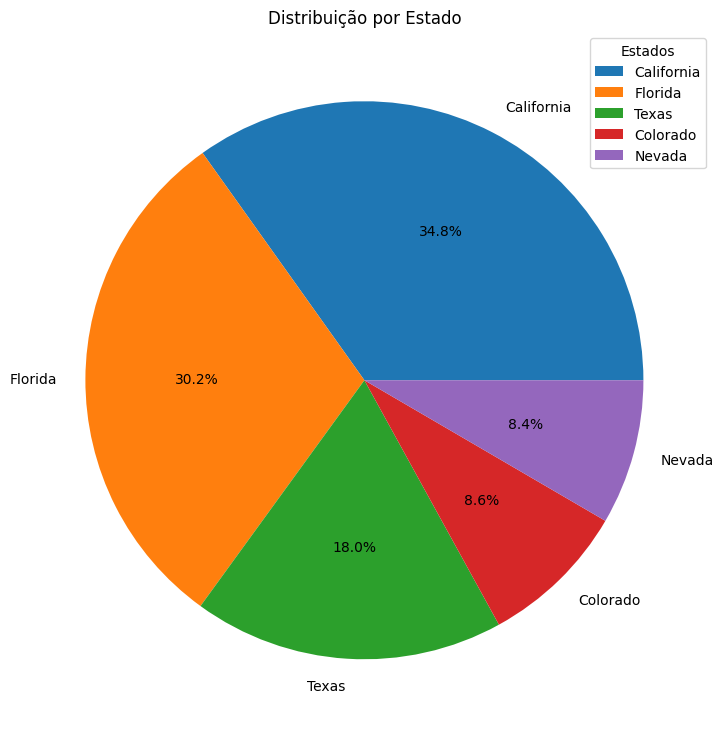

In [25]:
state_dict = {
                'FL': 'Florida',
                'TX': 'Texas',
                'NV': 'Nevada',
                'CO': 'Colorado',
                'GA': 'Georgia',
                'CA': 'California',
        }

df['location.state'] = df['location.state'].replace(state_dict)

state_counts = df['location.state'].value_counts().head(5)

plt.figure(figsize=(9, 15))
plt.pie(state_counts, labels = state_counts.index, autopct='%1.1f%%')
plt.title('Distribuição por Estado')
plt.legend(title = "Estados", loc="best")
plt.show()

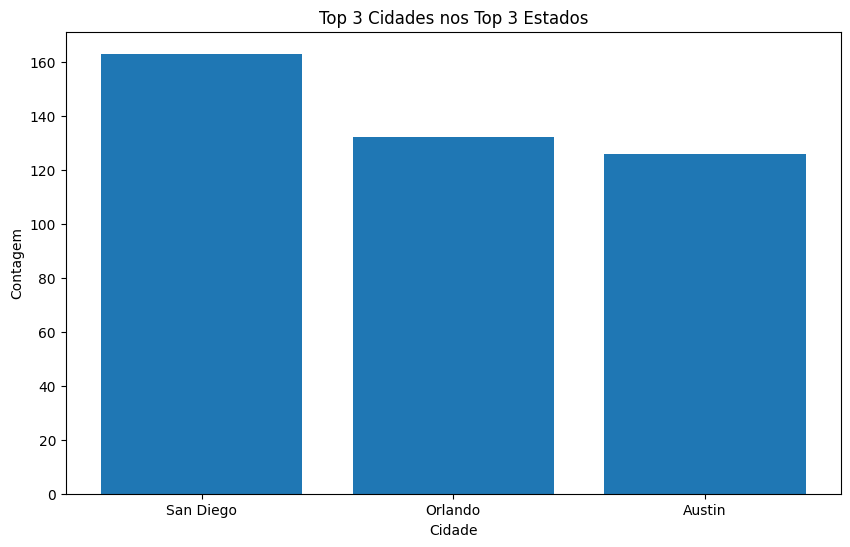

In [51]:
import matplotlib.pyplot as plt


top_states = state_counts.index[:3]
df_f = df[df['location.state'].isin(top_states)]
city_counts = df_f['location.city'].value_counts()
top_cities = city_counts.head(3)


plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities)
plt.title('Top 3 Cidades nos Top 3 Estados')
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.show()


c:\Users\me_ad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


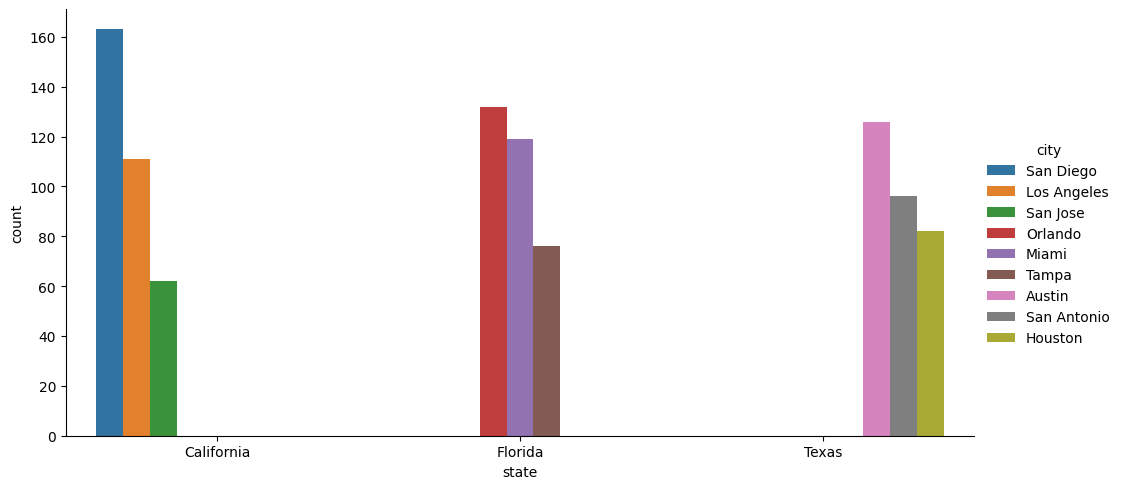

In [53]:
state=[]
city=[]
count=[]
for idx,i in df['location.state'].value_counts()[:3].items():
    for icx,j in df[df['location.state']==idx]['location.city'].value_counts()[:3].items():
        #print(idx,icx,j)
        state.append(idx)
        city.append(icx)
        count.append(j)
states={'state':state,
       'city':city,
       'count':count}
states=pd.DataFrame(states)
sns.catplot(data=states,x='state',y='count',kind='bar',hue='city', aspect=2)

In [28]:
df

,fuelType,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
0,ELECTRIC,13.0,12.0,Seattle,47.449107,-122.308841,WA,12847615.0,135.0,Tesla,Model X,suv,2019.0,Albuquerque
1,ELECTRIC,2.0,1.0,Tijeras,35.111060,-106.276551,NM,15621242.0,190.0,Tesla,Model X,suv,2018.0,Albuquerque
2,HYBRID,28.0,24.0,Albuquerque,35.127163,-106.566681,NM,10199256.0,35.0,Toyota,Prius,car,2012.0,Albuquerque
3,GASOLINE,21.0,20.0,Albuquerque,35.149726,-106.711425,NM,9365496.0,75.0,Ford,Mustang,car,2018.0,Albuquerque
4,GASOLINE,3.0,1.0,Albuquerque,35.208659,-106.601008,NM,3553565.0,47.0,Chrysler,Sebring,car,2010.0,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,GASOLINE,32.0,27.0,Honolulu,21.292950,-157.836856,HI,9794111.0,33.0,Chevrolet,Cruze,car,2017.0,Honolulu
5847,HYBRID,17.0,16.0,Aiea,21.375507,-157.914919,HI,2754690.0,49.0,Lexus,HS 250h,car,2010.0,Honolulu
5848,GASOLINE,18.0,17.0,Kailua,21.378719,-157.727816,HI,11313508.0,35.0,smart,fortwo,car,2013.0,Honolulu
5849,GASOLINE,1.0,0.0,Waipahu,21.376105,-158.020237,HI,4209883.0,77.0,GMC,Savana,van,2015.0,Honolulu


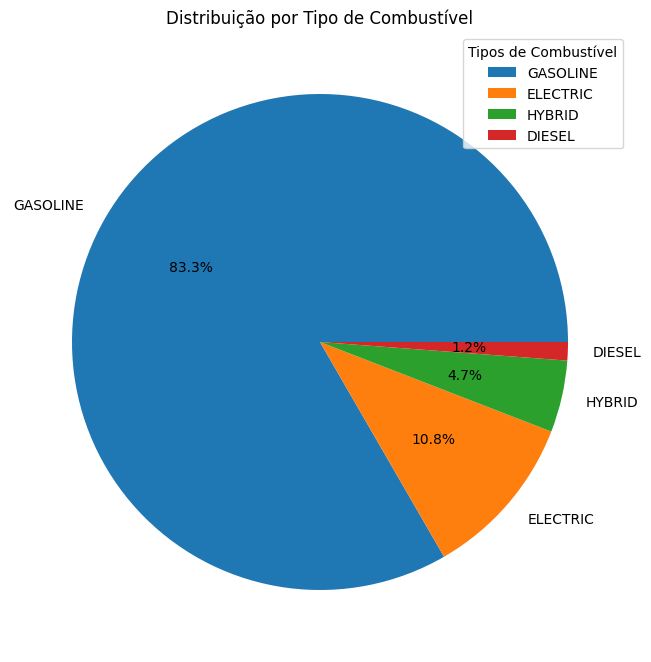

In [29]:

fuel_counts = df['fuelType'].value_counts()

plt.figure(figsize=(8, 10))
plt.pie(fuel_counts, labels = fuel_counts.index, autopct='%1.1f%%')
plt.title('Distribuição por Tipo de Combustível')
plt.legend(title = "Tipos de Combustível", loc="best")
plt.show()


c:\Users\me_ad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


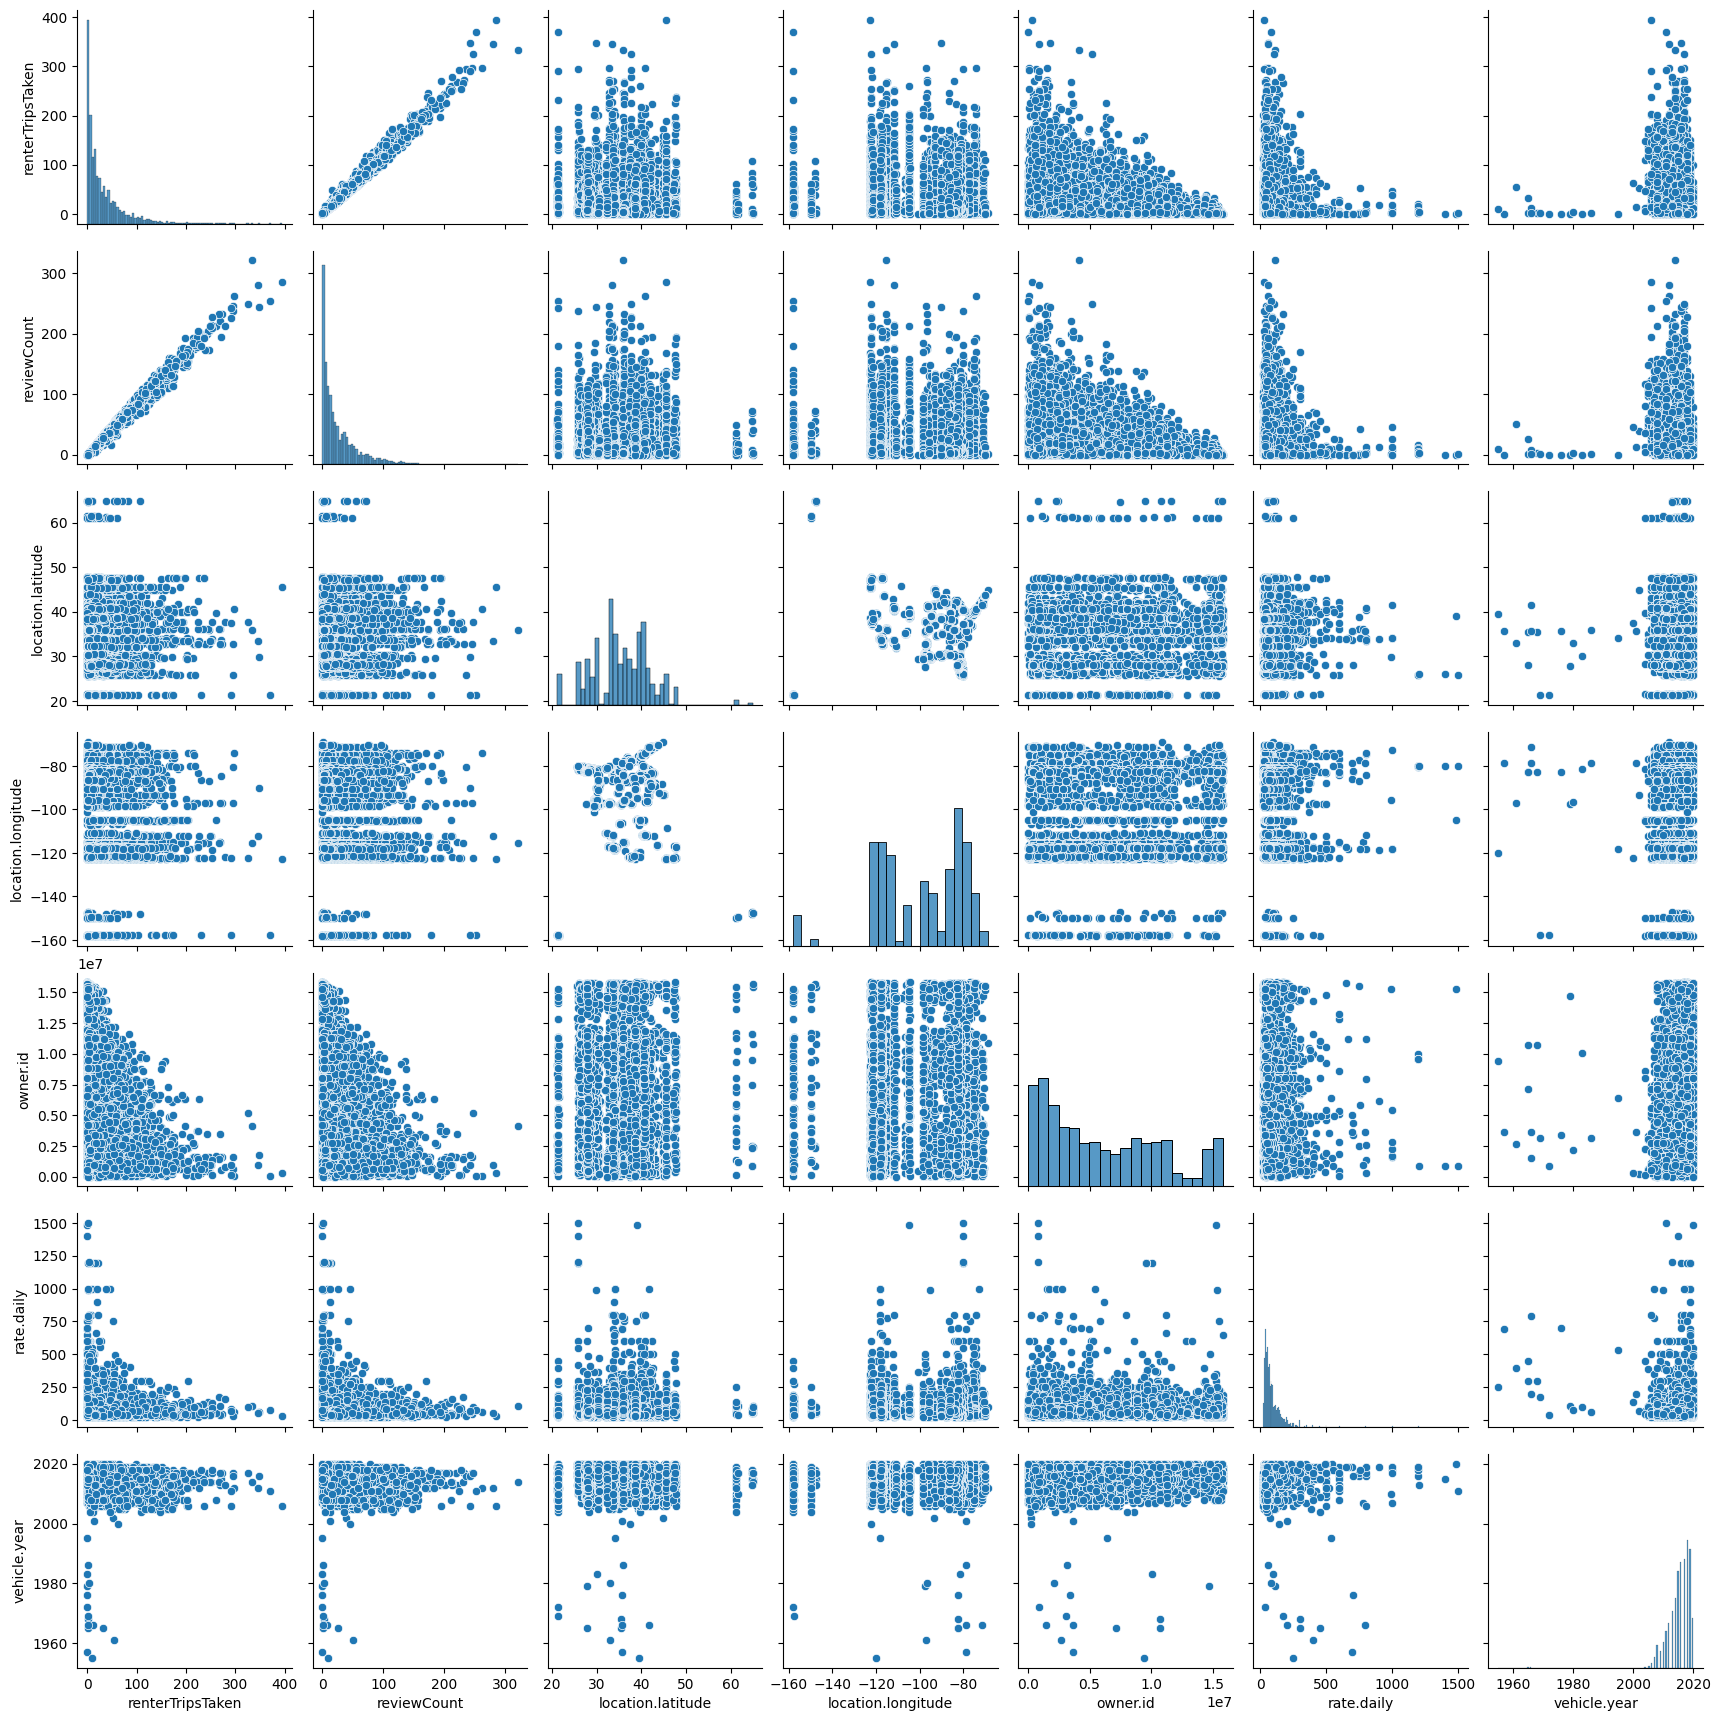

In [30]:
sns.pairplot(df)

<Axes: xlabel='renterTripsTaken', ylabel='reviewCount'>

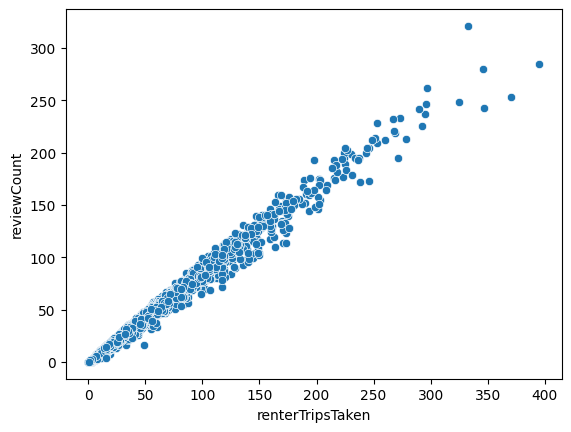

In [31]:
sns.scatterplot(x='renterTripsTaken',y='reviewCount',data=df)
#Com o pairplot conseguimos perceber uma co-relação muito alta entre reviewCount e renterTripsTaken, que são as viagens realizadas vs. a quantidade de reviews

Uma analise sobre as marcas mais escolhidas revela muito, mas só essa informação isolada pode gerar decisões erradas. Pois o Model 3, mantem a Tesla como o modelo mais alugado, mas o primeiro carro da Toyota aparece só em 7º lugar com o Corolla, seguido por Camry e Prius. 
Minha analise é que mesmo os carros da Toyota não tendo nenhum record de alguel de forma individual, é necessário que tenha sempre os 3 modelos à disponibilidade, pois a Toyota é a segunda marca mais utilizada, e primeira se tratando apenas de gasolina. 

Text(0.5, 0, 'Marca do Veiculo')

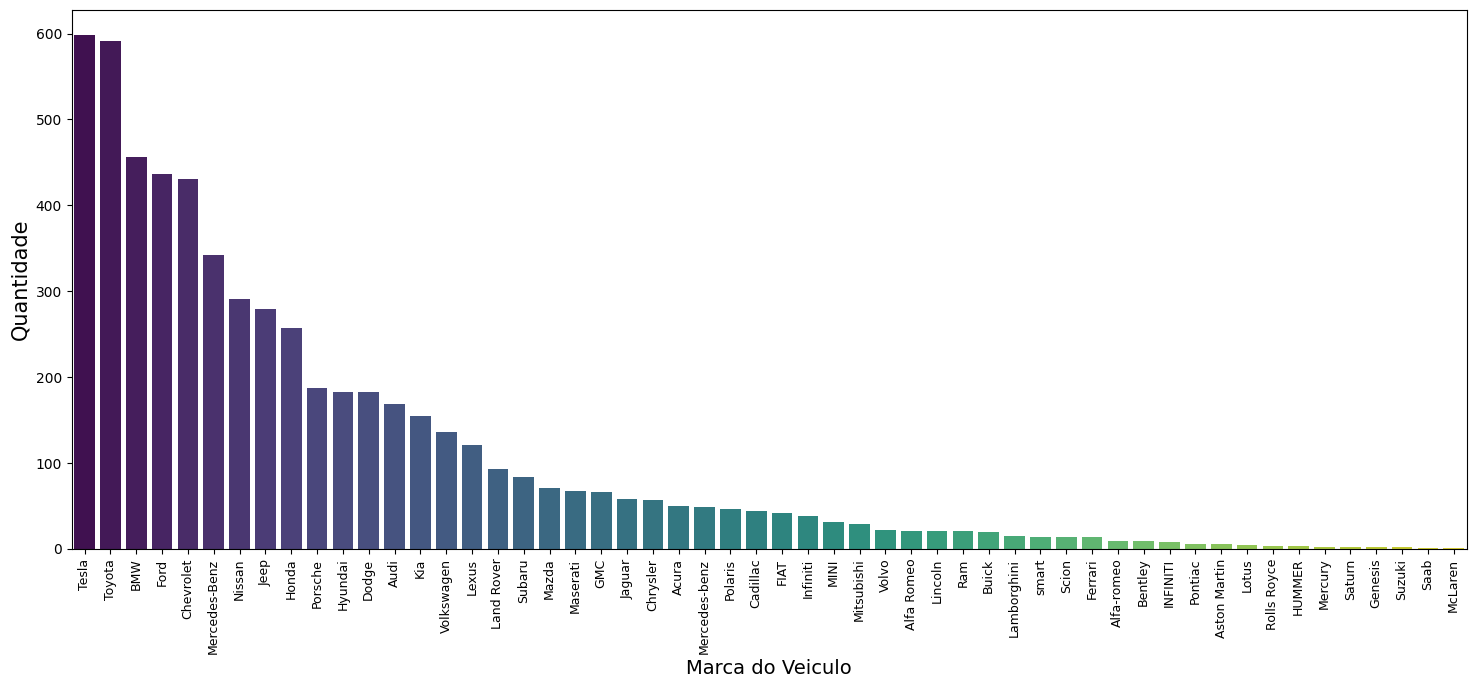

In [33]:
labels = df['vehicle.make'].value_counts().index
f, img = plt.subplots(figsize=(18, 7))
sns.countplot(x='vehicle.make', data=df,order = labels,palette='viridis')

plt.xticks(rotation= 90,fontsize=9 )
img.set_ylabel('Quantidade', fontsize=15)
img.set_xlabel('Marca do Veiculo', fontsize=14)

Text(0.5, 0, 'Marca do Veiculo')

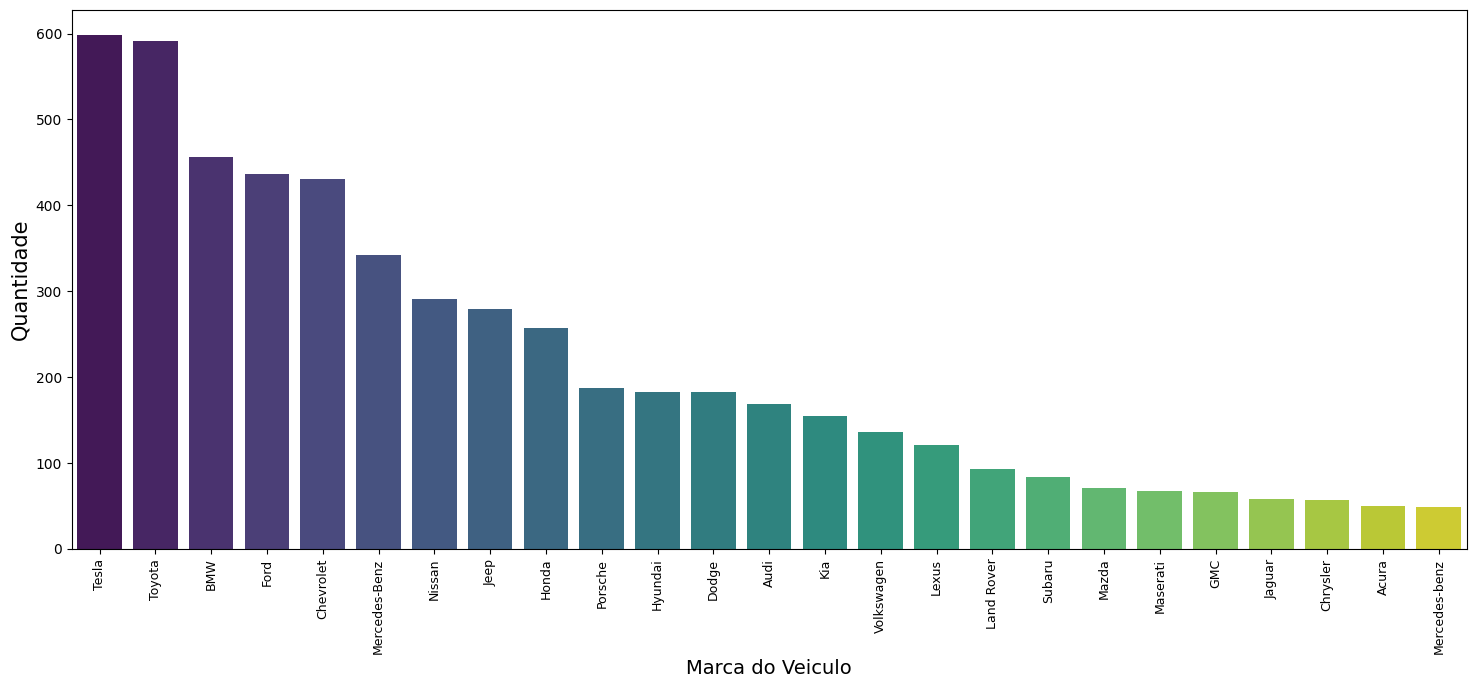

In [39]:
labels = df['vehicle.make'].value_counts().nlargest(25).index
f, img = plt.subplots(figsize=(18, 7))
sns.countplot(x='vehicle.make', data=df, order=labels, palette='viridis')

plt.xticks(rotation=90, fontsize=9)
img.set_ylabel('Quantidade', fontsize=15)
img.set_xlabel('Marca do Veiculo', fontsize=14)


In [36]:
df['vehicle.model'].value_counts()

vehicle.model
Model 3         331
Mustang         151
Model S         130
Wrangler        123
Model X         114
               ... 
NX                1
Vibe              1
Q60 Coupe         1
Blazer            1
Cooper Coupe      1
Name: count, Length: 526, dtype: int64


Text(0.5, 0, 'Modelo do Veiculo')

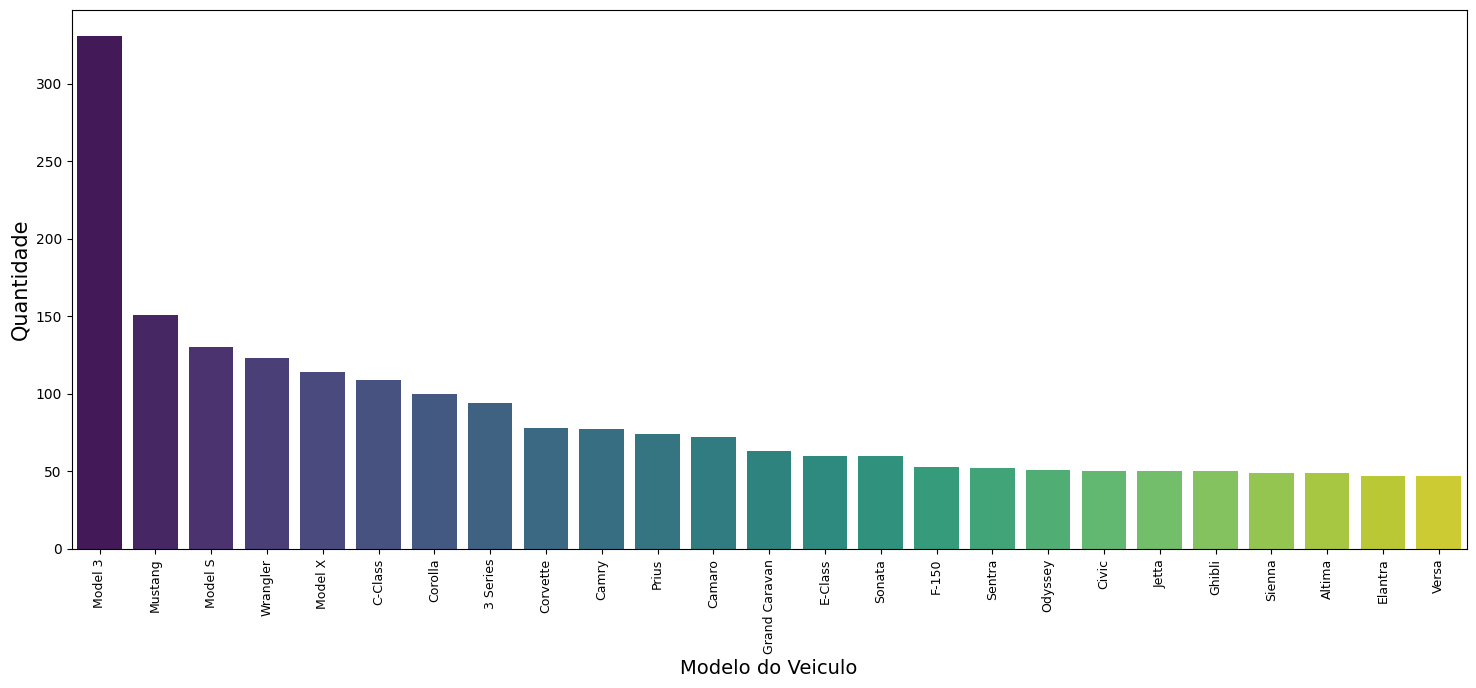

In [44]:

top_25 = df['vehicle.model'].value_counts().nlargest(25).index
df_top_25 = df[df['vehicle.model'].isin(top_25)]

f, img = plt.subplots(figsize=(18, 7))
sns.countplot(x='vehicle.model', data=df_top_25, order=top_25, palette='viridis')

plt.xticks(rotation=90, fontsize=9)
img.set_ylabel('Quantidade', fontsize=15)
img.set_xlabel('Modelo do Veiculo', fontsize=14)


Tão importante quanto os carros mais augados, tambem são os carros menos alugados. Um carro que só foi alugado 1x no ano provavelmente gerou prejuizo, com o espaço acupado e a desvalorização. E se desfazer desses carros pode gerar um ganho duplo, deixando de perder dinheiro em uma ponta, e podendo aplicar esse dinheiro para modelos que gerem mais saida.

Text(0.5, 0, 'Marca do Veiculo')

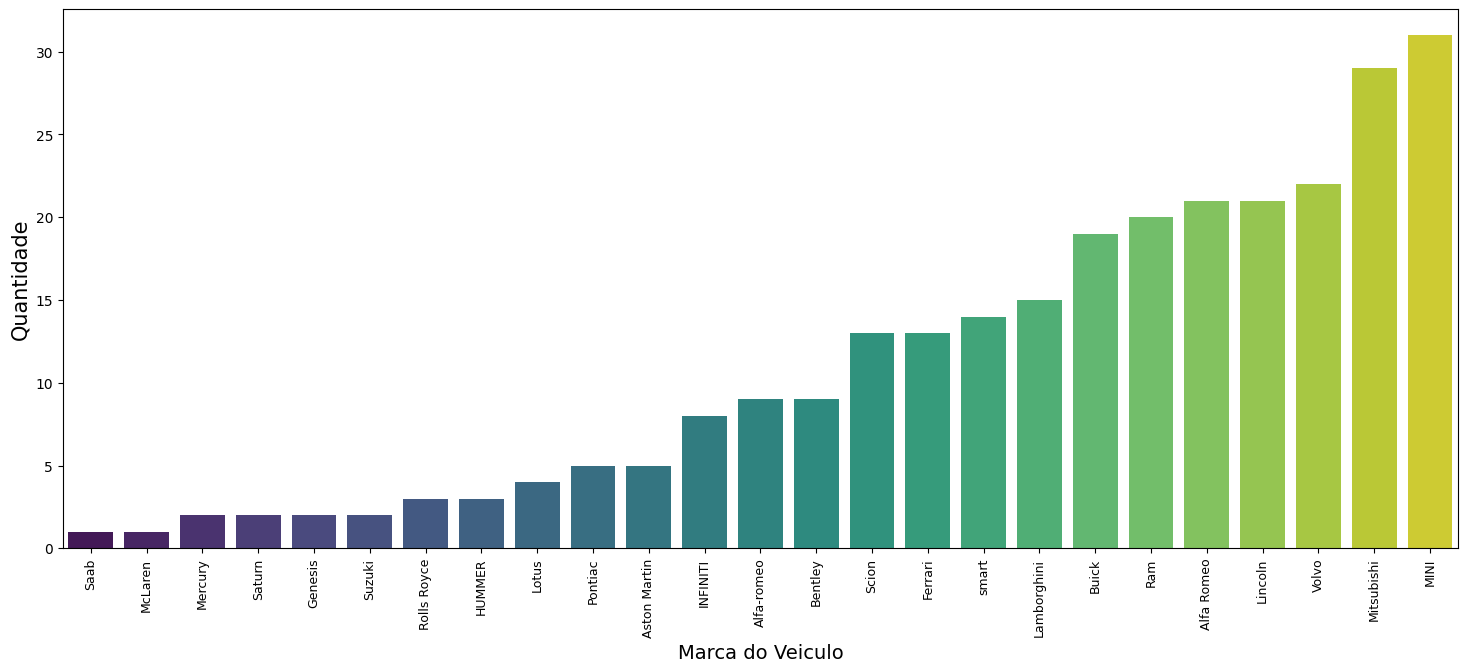

In [59]:
labels = df['vehicle.make'].value_counts().nsmallest(25).index
f, img = plt.subplots(figsize=(18, 7))
sns.countplot(x='vehicle.make', data=df, order=labels, palette='viridis')

plt.xticks(rotation=90, fontsize=9)
img.set_ylabel('Quantidade', fontsize=15)
img.set_xlabel('Marca do Veiculo', fontsize=14)


Text(0.5, 0, 'Modelo do Veiculo')

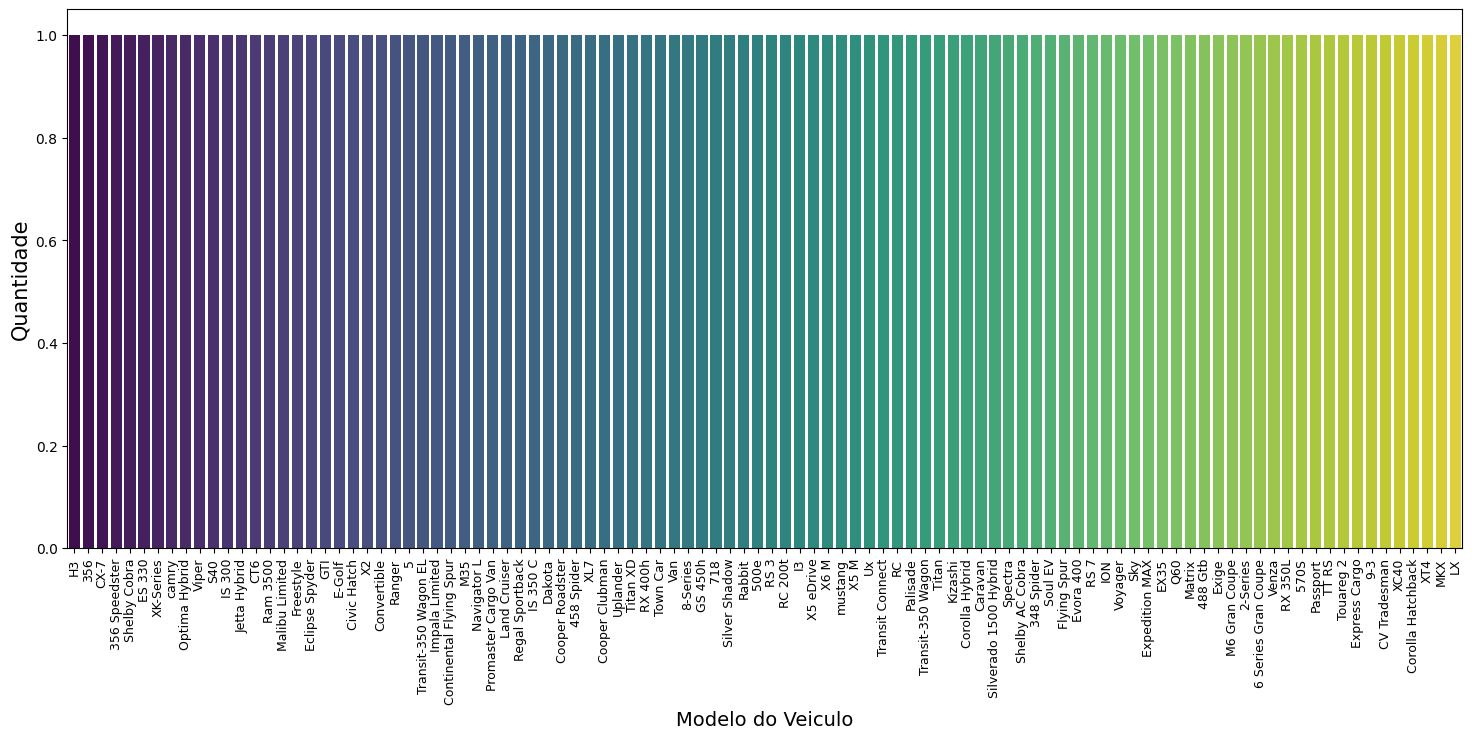

In [66]:

small_100 = df['vehicle.model'].value_counts().nsmallest(100).index
df_small_100 = df[df['vehicle.model'].isin(small_100)]

f, img = plt.subplots(figsize=(18, 7))
sns.countplot(x='vehicle.model', data=df_small_100, order=small_100, palette='viridis')

plt.xticks(rotation=90, fontsize=9)
img.set_ylabel('Quantidade', fontsize=15)
img.set_xlabel('Modelo do Veiculo', fontsize=14)

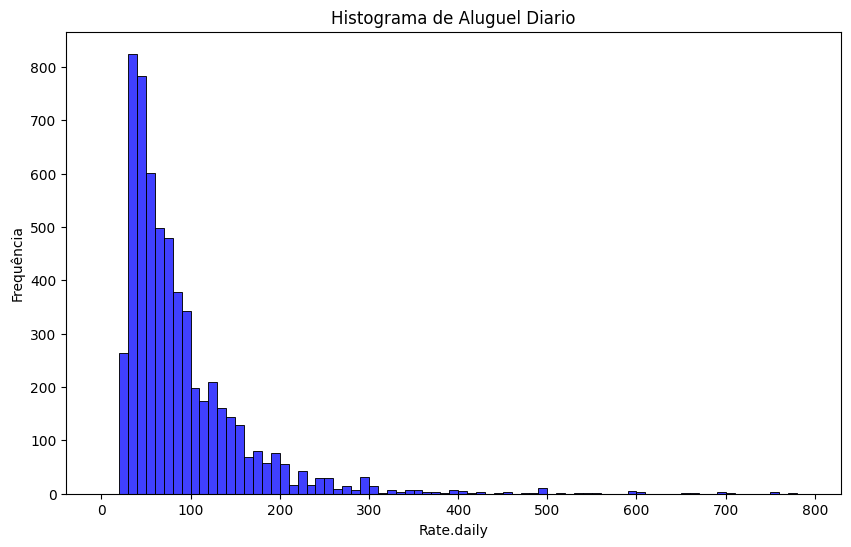

In [74]:
#Range do valor de alugueis
df_rate = df[df['rate.daily'] <= 1000]

plt.figure(figsize=(10, 6))
sns.histplot(df_rate['rate.daily'], bins=range(0, 800, 10), kde=False, color='blue')
plt.title('Histograma de Aluguel Diario')
plt.xlabel('Rate.daily')
plt.ylabel('Frequência')
plt.show()

